In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [73]:
college_players = pd.read_csv('college_noname.csv', index_col = 0)

In [74]:
not_drafted = college_players[college_players['drafted'] == 0]
# len(not_drafted)

In [75]:
drafted = college_players[college_players['drafted'] == 1]
# len(drafted)

In [76]:
sampled_n_drafted = not_drafted.sample(n = 2000)
# len(sampled_n_drafted)

In [77]:
new_df = pd.concat([drafted, sampled_n_drafted])

In [78]:
new_df.to_csv(r'college_noname.csv')

In [79]:
y = new_df['drafted']

X  = new_df.drop(['drafted'], axis = 1)


In [80]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

test_preds = dummy.predict(X_test)
print("Accuracy Score Found: ")
print(accuracy_score(y_test, test_preds) *100)
print("\nRecall Score Found: ")
print(recall_score(y_test, dummy_pred)* 100)

Accuracy Score Found: 
56.40766902119072

Recall Score Found: 
32.6530612244898


In [93]:
labels = ['Drafted', 'Not Drafted']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greys):
    
    # Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [97]:
dummy_cv_score = cross_val_score(dummy, X_train, y_train, cv=3)
mean_dummy_cv_score = np.mean(dummy_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dummy_cv_score * 100))

Mean Cross Validation Score: 54.05%


In [95]:
def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Accuracy Score: 0.5640766902119072
Precision Score: 0.3521594684385382
Recall Score: 0.30903790087463556
F1 Score: 0.32919254658385094

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       648
           1       0.35      0.31      0.33       343

    accuracy                           0.56       991
   macro avg       0.50      0.50      0.50       991
weighted avg       0.55      0.56      0.56       991



Predicted    0    1  All
True                    
0          453  195  648
1          237  106  343
All        690  301  991


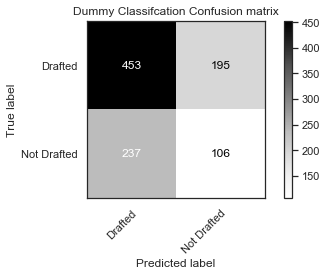

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       648
           1       0.35      0.31      0.33       343

    accuracy                           0.56       991
   macro avg       0.50      0.50      0.50       991
weighted avg       0.55      0.56      0.56       991



In [94]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Dummy Classifcation Confusion matrix')

plt.show()

print(classification_report(y_test, test_preds))